Trial Function:  A*sin(pi*x/L)
Residual Function:  -pi**2*A*E*I*sin(pi*x/L)/L**2 - Mo
Y from Galerkin:  -4*L**2*Mo*sin(pi*x/L)/(pi**3*E*I)
Y from Least Squares:  -4*L**2*Mo*sin(pi*x/L)/(pi**3*E*I)
Y from Collocation:  -L**2*Mo*sin(pi*x/L)/(pi**2*E*I)
Y from Variationa:  -4*L**2*Mo*sin(pi*x/L)/(pi**3*E*I)
Y from Exact:  Mo*x*(-L + x)*sin(pi*x/L)/(2*E*I)


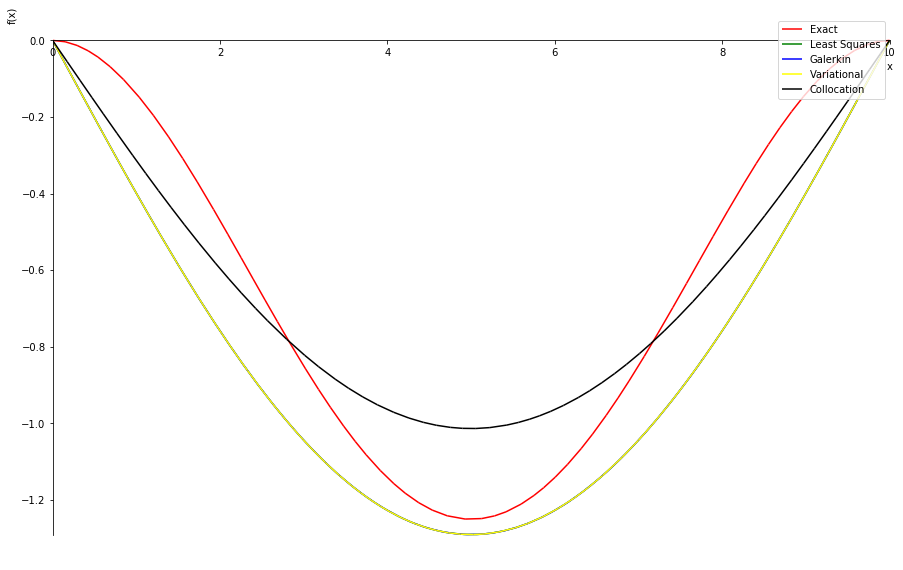

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sym
plt.rcParams['figure.figsize'] = [15, 10]

ModOfElasticty = 10
Inertia = 10
Moment = 10
Length = 10

x, A, L, E, I, Mo = sym.symbols('x A L E I Mo')
y = sym.symbols('y', cls=sym.Function)

#Trial function y
yTrial = A * x * (L-x)
yTrial = A * sym.sin(sym.pi * x / L)
#Trial = A * x**2 * (L-x)
print('Trial Function: ', yTrial)

#Residual Function
resd = E * I * sym.diff(yTrial, x, 2) - Mo
print('Residual Function: ',resd)

def galerkin(yT, resd):
    gkin = sym.simplify(sym.expand(sym.integrate(yT * resd, (x, 0, L))))
    #print(gkin)
    gsol = sym.solveset(gkin,A)
    return(gsol.args[1])

def leastSquare(yT, resd):
    ls = sym.simplify(sym.expand(sym.integrate(resd * resd, (x, 0, L))))
    #print(ls)
    dls = sym.diff(ls, A)
    #print(dls)
    lsol = sym.solveset(dls, A)
    return(lsol.args[0])

def collocation(yT, resd, pos):
    resdSubs = resd.subs(x , pos)
    csol = sym.solveset(resdSubs, A)
    return(csol.args[0])

def variational(yT):
    dyt = sym.diff(yT, x)
    #print(dyt)
    base = ((E * I / 2) * dyt**2 + Mo * yT)
    #print(base)
    inteq = sym.integrate(sym.simplify(base), (x, 0, L))
    #print(inteq)
    diffInt = sym.diff(inteq, A)
    vsol = sym.solveset(diffInt, A)
    #print(vsol)
    try: 
        return(vsol.args[1].args[1].args[0])
    except:
        return(vsol.args[0])
    
def exact():
    res = sym.Eq(E * I * y(x).diff(x,x), Mo)
    esol = sym.dsolve(res,y(x)).rhs
    #print(esol)
    constants = sym.solve([esol.subs(x,0), esol.subs(x, L)], sym.symbols('C1 C2'))
    fans = esol.subs(constants)
    return(sym.factor(fans))
    
def valueSub(y):
    y = y.subs(E,ModOfElasticty)
    y = y.subs(I,Inertia)
    y = y.subs(L,Moment)
    y = y.subs(Mo,Length)
    return y

ygal = yTrial.subs(A, galerkin(yTrial, resd))    
ylea = yTrial.subs(A, leastSquare(yTrial, resd))    
ycol = yTrial.subs(A, collocation(yTrial, resd, L/2))
yvar = yTrial.subs(A, variational(yTrial))
yexa = yTrial.subs(A, exact())
print('Y from Galerkin: ',ygal)
print('Y from Least Squares: ',ylea)
print('Y from Collocation: ',ycol)
print('Y from Variationa: ',yvar)
print('Y from Exact: ',sym.simplify(yexa))

p = sym.plot(valueSub(yexa), valueSub(ylea), valueSub(ygal), valueSub(yvar), valueSub(ycol), (x,0,10),\
             legend = True, show = False)
p[0].line_color = 'red'
p[1].line_color = 'green'
p[2].line_color = 'blue'
p[3].line_color = 'yellow'
p[4].line_color = 'black'
p[0].label = 'Exact'
p[1].label = 'Least Squares'
p[2].label = 'Galerkin'
p[3].label = 'Variational'
p[4].label = 'Collocation'
p.show()